In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display, HTML

In [2]:
# global settings
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

plt.figure(figsize=(10, 3))

plt.style.use('seaborn-whitegrid')

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

%matplotlib inline

# Problema

**Objetivo**

Identificar clientes alvo para ações de venda

**Principais questões:**

1. quais  são  os  clientes  que  estão  mais propensos a responder a campanhas promocionais
2. quais as principais características dos clientes propensos a aceitar oferta de um produto ou serviço




A principal vantagem de construir modelos preditivos para atividades como  essa, é a  possibilidade  de  identificar  clientes  potenciais  e direcionar  investimentos  de  Marketing  e  Vendas  de  forma  mais assertiva commaior probabilidade de sucesso


In [14]:
df_raw = pd.read_csv("bank.csv", sep=";")

In [15]:
# Visualizando a estrutura do dataset
df_raw.shape

(4521, 17)

In [16]:
df_raw.head().T

,0,1,2,3,4
age,30,33,35,30,59
job,unemployed,services,management,management,blue-collar
marital,married,married,single,married,married
education,primary,secondary,tertiary,tertiary,secondary
default,no,no,no,no,no
balance,1787,4789,1350,1476,0
housing,no,yes,yes,yes,yes
loan,no,yes,no,yes,no
contact,cellular,cellular,cellular,unknown,unknown
day,19,11,16,3,5


In [17]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
response     4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [18]:
# convertar variáveis categóricas

df_raw["response"] = np.where(df_raw["response"] == "yes", 1 , 0)

categorical = [col for col in df_raw.dtypes[df_raw.dtypes == "object"].index]
categorical

for col in categorical:
    if col == "month":
        categories = ['jan', 'feb', 'mar', 'apr' ,  'may', 'jun', 'jul', 'aug', 'sep' ,'oct' , 'nov' , 'dec']
        df_raw[col] =  df_raw[col].astype('category', categories=categories, ordered=True)
    else:
        df_raw[col] =  df_raw[col].astype('category')

# Análise Exploratória

In [19]:
df_raw.describe()

,age,balance,day,duration,campaign,pdays,previous,response
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579,0.115240
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562,0.319347
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,1.000000


In [20]:
df_raw.groupby("response").mean()

,age,balance,day,duration,campaign,pdays,previous
response,,,,,,,
0,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
1,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


* Clientes com idade média de 41 anos.
* Saldo média em conta corrente é de 1422 com desvio padrão de 3009

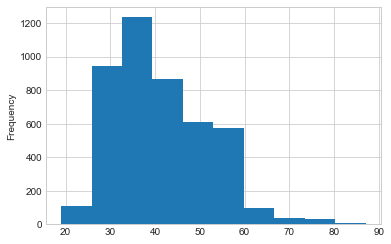

In [21]:
df_raw.age.plot.hist()

0    0.88476
1    0.11524
Name: response, dtype: float64

0    0.77451
1    0.22549
Name: response, dtype: float64

Text(0.5,1,'Clientes que foram contactados')

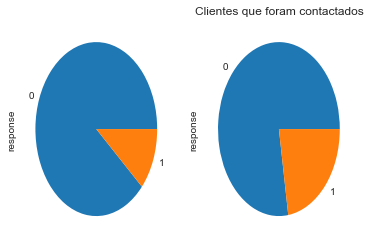

In [11]:
plt.subplot(121)
# percentual de clientes que aceitaram ou não a oferta de um produto ou serviço 
display(df_raw.response.value_counts() / len(df_raw))
df_raw.response.value_counts().plot.pie()


plt.subplot(122)
# percentual de clientes contactados que aceitaram ou não a oferta de um produto ou serviço 
display(df_raw[df_raw.previous > 0].response.value_counts() / len(df_raw[df_raw.previous > 0]))
df_raw[df_raw.previous > 0].response.value_counts().plot.pie()
plt.title("Clientes que foram contactados")

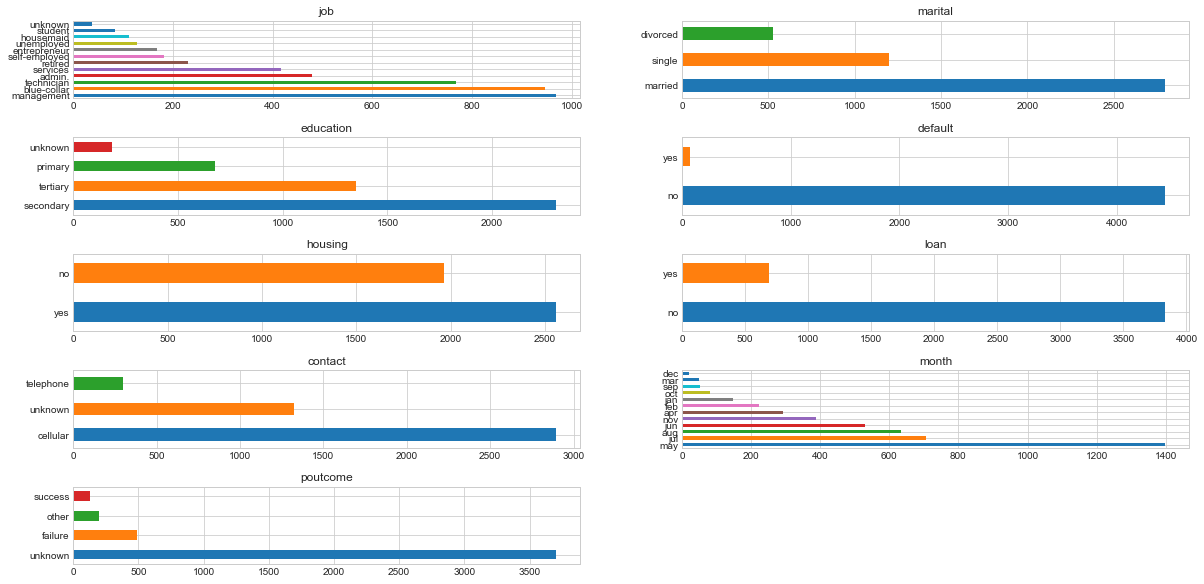

In [22]:
categorical = [col for col in df_raw.dtypes[df_raw.dtypes == "category"].index]
f = plt.figure(figsize=(20,10))
for i in range(len(categorical)):
    plt.subplot(5,2,i + 1)
    col = categorical[i]
    df_raw[col].value_counts().plot.barh(title = col)

plt.subplots_adjust(hspace=.5)
plt.show()

In [23]:
# Um pouco de Feature engineering
# dividindo Job em 3 categorias principais: "White Collar", "Blue Collar", "Other/Unknown" 
df_raw.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

Blue Collar      2131
White Collar     1798
Other/Unknown     592
Name: jobtype, dtype: int64

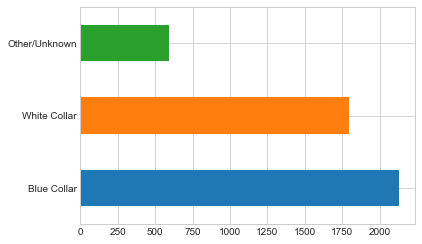

In [24]:
white_collar_list = ["admin.","entrepreneur","management","self-employed"]  
blue_collar_list = ["blue-collar","services","technician"]

df_raw["jobtype"] =  "Other/Unknown"
df_raw.loc[df_raw.job.isin(white_collar_list), "jobtype"] =  "White Collar"
df_raw.loc[df_raw.job.isin(blue_collar_list), "jobtype"] =   "Blue Collar"


df_raw["jobtype"] = df_raw["jobtype"].astype("category")

display(df_raw.jobtype.value_counts())

df_raw.jobtype.value_counts().plot.barh()

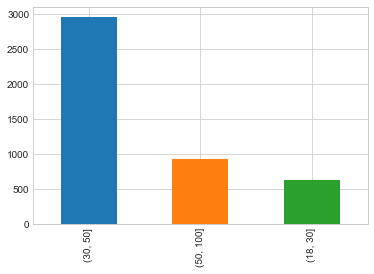

In [25]:
# criando faixa etária
df_raw["faixa_etaria"] = pd.cut(df_raw['age'], [18, 30, 50, 100])

df_raw["faixa_etaria"].value_counts().plot.bar()

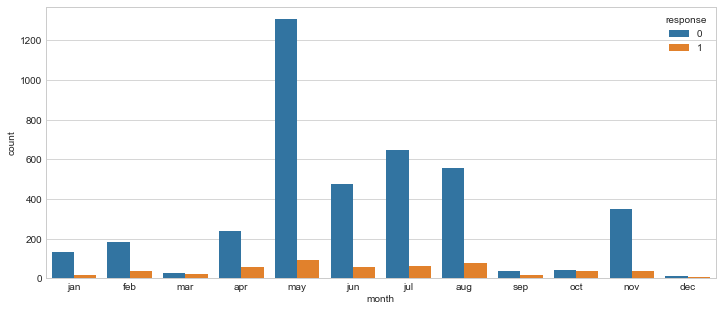

In [26]:
# histórico de promocoes

#df_raw.month.value_counts(sort=False).plot.bar()

plt.figure(figsize=(12,5))

tmp = df_raw.groupby(["month", "response"], as_index=False).agg({"previous" : {"count": "count"}})
tmp.columns = ["month","response", "count"]

sns.barplot(x="month", y="count",   hue="response", data=tmp)

## Avaliando Clientes que nunca receberam contato da equipe de vendas

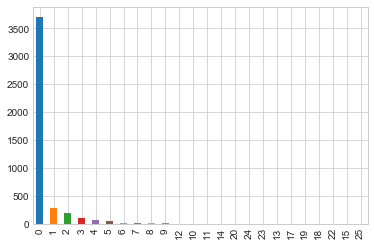

In [27]:
df_raw.previous.value_counts().plot.bar()

In [28]:
# Selecionando subsets de casos (observações no dataset) de clientes que nunca receberam contato da equipe de vendas
bankwork = df_raw[df_raw.previous == 0]

bankwork.describe()

,age,balance,day,duration,campaign,pdays,previous,response
count,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.0,3705.0,3705.000000
mean,41.083671,1374.862078,16.205938,262.103104,2.964912,-1.0,0.0,0.090958
std,10.373818,3008.524207,8.304379,262.937329,3.329925,0.0,0.0,0.287588
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.0,0.0,0.000000
25%,33.000000,60.000000,9.000000,102.000000,1.000000,-1.0,0.0,0.000000
50%,39.000000,415.000000,16.000000,180.000000,2.000000,-1.0,0.0,0.000000
75%,49.000000,1412.000000,22.000000,327.000000,3.000000,-1.0,0.0,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,-1.0,0.0,1.000000


### Examinando a relação entre idade e reposta à promoções

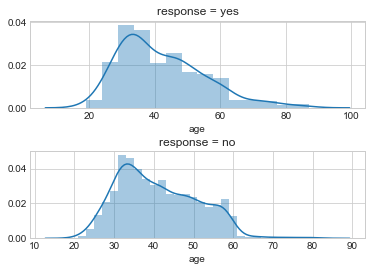

In [29]:
plt.subplot(211)
plt.title("response = yes")
sns.distplot(bankwork[bankwork.response == 1]["age"])
plt.subplot(212)
plt.title("response = no")
sns.distplot(bankwork[bankwork.response == 0]["age"])

plt.subplots_adjust(hspace=.5)


### Examinando a relação entre educação e reposta à promoções

In [30]:
cm = sns.light_palette("green", as_cmap=True)

pd.crosstab(bankwork.education, bankwork.response).style.background_gradient(cmap=cm)

response,0,1
education,,
primary,532,48
secondary,1735,156
tertiary,962,122
unknown,139,11


### Examinando a relação entre tipo de emprego e reposta às promoções

response,0,1
jobtype,,
Blue Collar,1648,128
Other/Unknown,407,69
White Collar,1313,140


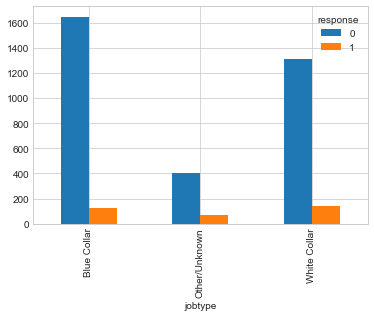

In [31]:
cm = sns.light_palette("green", as_cmap=True)

display(pd.crosstab(bankwork.jobtype, bankwork.response).style.background_gradient(cmap=cm))


pd.crosstab(bankwork.jobtype, bankwork.response).plot.bar()

###  Examinando a relação entre o estado civil e reposta às promoções

response,0,1
marital,,
divorced,387,56
married,2135,170
single,846,111


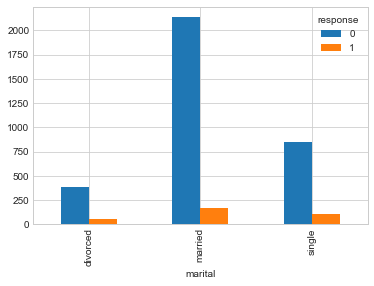

In [230]:
cm = sns.light_palette("green", as_cmap=True)

display(pd.crosstab(bankwork.marital, bankwork.response).style.background_gradient(cmap=cm))


pd.crosstab(bankwork.marital, bankwork.response).plot.bar()

###  Examinando a relação entre atraso no pagamento de crédito e reposta às promoções

In [32]:
cm = sns.light_palette("green", as_cmap=True)

pd.crosstab(bankwork.default, bankwork.response).style.background_gradient(cmap=cm)

response,0,1
default,,
no,3305,329
yes,63,8


### Examinando o saldo médio da conta corrente dos clientes alvo

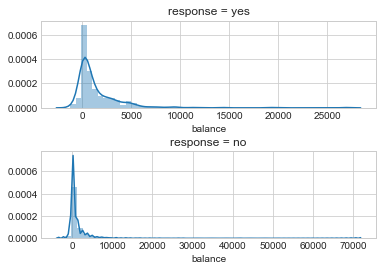

In [33]:
plt.subplot(211)
plt.title("response = yes")
sns.distplot(bankwork[bankwork.response == 1]["balance"])
plt.subplot(212)
plt.title("response = no")
sns.distplot(bankwork[bankwork.response == 0]["balance"])

plt.subplots_adjust(hspace=.5)

In [34]:
cm = sns.light_palette("green", as_cmap=True)

pd.crosstab(bankwork.education, bankwork.response, values=bankwork.balance, aggfunc=np.mean ).style.background_gradient(cmap=cm)

response,0,1
education,,
primary,1360.54,1986.38
secondary,1159.38,1198.53
tertiary,1697.68,1645.06
unknown,1516.68,2866.82


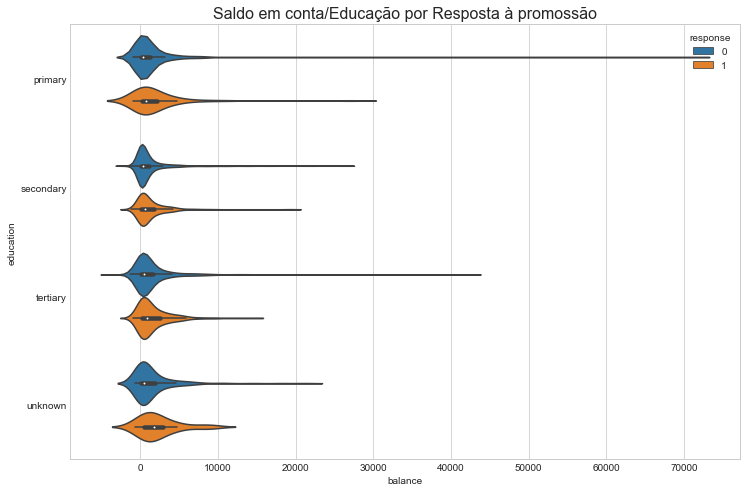

In [35]:
fig = plt.figure(figsize=(12,8))

sns.violinplot(x="balance", y="education", hue="response",        data=df_raw);

plt.title("Saldo em conta/Educação por Resposta à promossão", fontsize=16)

plt.show()

### Examinando a relação entre financiamento de casa e reposta às promoções

response,0,1
housing,,
no,1468,194
yes,1900,143


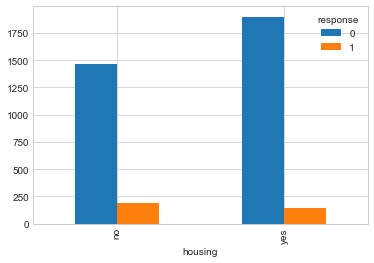

In [36]:
cm = sns.light_palette("green", as_cmap=True)

display(pd.crosstab(bankwork.housing, bankwork.response).style.background_gradient(cmap=cm))



pd.crosstab(bankwork.housing, bankwork.response).plot.bar()

###  Examinando a relação entre empréstimo pessoal e reposta às promoções


response,0,1
loan,,
no,1448.35,1600.7
yes,916.813,771.133


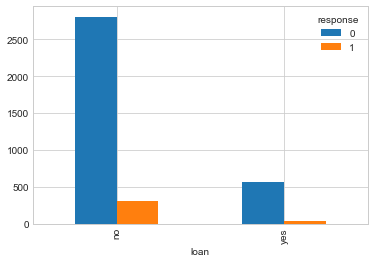

In [37]:
cm = sns.light_palette("green", as_cmap=True)

display(pd.crosstab(bankwork.loan, bankwork.response, values=bankwork.balance, aggfunc=np.mean )
        .style.background_gradient(cmap=cm))



pd.crosstab(bankwork.loan, bankwork.response).plot.bar()

## Correlação entre variáveis

In [38]:
df = df_raw.copy()

#converte variáveis categoricas em numeros
categorical = [col for col in df_raw.dtypes[df_raw.dtypes == "category"].index]
for col in categorical:
    df[col] = df[col].cat.codes

In [39]:
# Compute the correlation matrix
corr = df.corr()

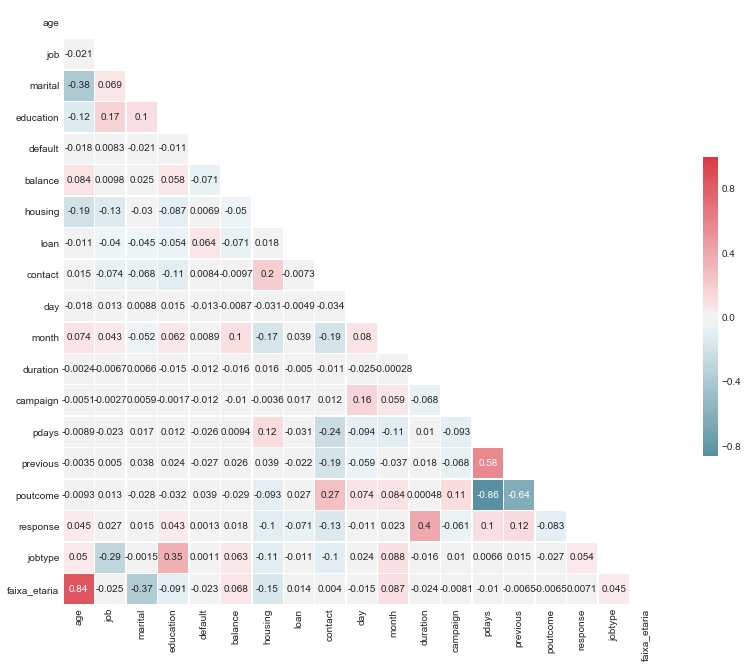

In [40]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, #vmax=.3, 
            center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Preprocessamento

In [41]:
y = df_raw.response
X = df_raw[df_raw.columns.difference(["response", "campaign", "month","job","age","poutcome", "day", "duration", "pdays", "previous", "contact"])]

In [42]:
X.head()

,balance,default,education,faixa_etaria,housing,jobtype,loan,marital
0,1787,no,primary,"(18, 30]",no,Other/Unknown,no,married
1,4789,no,secondary,"(30, 50]",yes,Blue Collar,yes,married
2,1350,no,tertiary,"(30, 50]",yes,White Collar,no,single
3,1476,no,tertiary,"(18, 30]",yes,White Collar,yes,married
4,0,no,secondary,"(50, 100]",yes,Blue Collar,no,married


In [43]:
# One Hot encoding
X = pd.get_dummies(X)

In [44]:
X.head().T

,0,1,2,3,4
balance,1787,4789,1350,1476,0
default_no,1,1,1,1,1
default_yes,0,0,0,0,0
education_primary,1,0,0,0,0
education_secondary,0,1,0,0,1
education_tertiary,0,0,1,1,0
education_unknown,0,0,0,0,0
"faixa_etaria_(18, 30]",1,0,0,1,0
"faixa_etaria_(30, 50]",0,1,1,0,0
"faixa_etaria_(50, 100]",0,0,0,0,1


# Criando um modelo preditivo com Regressão Logística (Baseline)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, stratify =y, test_size=0.3)

In [46]:
from sklearn.linear_model import  LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(random_state=6, class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=6,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [47]:
y_pred = logreg.predict(X_test)

print('Acurácia no treino: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Acurácia no teste: {:.2f}'.format(logreg.score(X_test, y_test)))

Acurácia no treino: 0.61
Acurácia no teste: 0.62


## Avaliando modelo

### Confusion Matrix

In [364]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[757 444]
 [ 70  86]]


### Calculando precision, recall, F-measure and support

In [365]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.63      0.75      1201
           1       0.16      0.55      0.25       156

   micro avg       0.62      0.62      0.62      1357
   macro avg       0.54      0.59      0.50      1357
weighted avg       0.83      0.62      0.69      1357



### Curva ROC

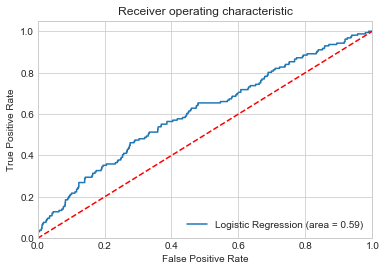

In [366]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [48]:
from sklearn.model_selection import cross_val_score
clf = LogisticRegression(random_state=6, class_weight='balanced')
scores = cross_val_score(clf, X, y, scoring='roc_auc', cv=10)
scores.mean()

0.6266188316400579

## Criando modelo preditivo com Random Forest

In [49]:
from sklearn.ensemble import  RandomForestClassifier

rf = RandomForestClassifier(random_state=6, max_features=0.5, class_weight='balanced')

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=0.5,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False, random_state=6,
            verbose=0, warm_start=False)

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


cv = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10, 80],
    'max_features': [2, 3, 0.5],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 100, 200]
}
# Create a based model
rf = RandomForestClassifier(random_state=6,  class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,  cv = cv, n_jobs = -1,  scoring='roc_auc' )


# Fit the grid search to the data
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 10}

In [72]:
rf = grid_search.best_estimator_

cv = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


scores = cross_val_score(rf, X, y, scoring='roc_auc', cv=cv)
scores.mean()

0.6358330460812772

### Feature importance

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

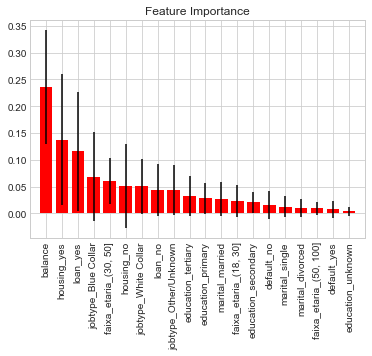

In [73]:
from scikitplot.estimators import plot_feature_importances

plot_feature_importances(rf, feature_names=X.columns)
plt.xticks(rotation = 90)

('balance', 0.24)
('housing_yes', 0.14)
('loan_yes', 0.12)
('jobtype_Blue Collar', 0.07)
('faixa_etaria_(30, 50]', 0.06)
('housing_no', 0.05)
('jobtype_White Collar', 0.05)
('jobtype_Other/Unknown', 0.04)
('loan_no', 0.04)
('education_primary', 0.03)
('education_tertiary', 0.03)
('marital_married', 0.03)
('default_no', 0.02)
('education_secondary', 0.02)
('faixa_etaria_(18, 30]', 0.02)
('default_yes', 0.01)
('faixa_etaria_(50, 100]', 0.01)
('marital_divorced', 0.01)
('marital_single', 0.01)
('education_unknown', 0.0)


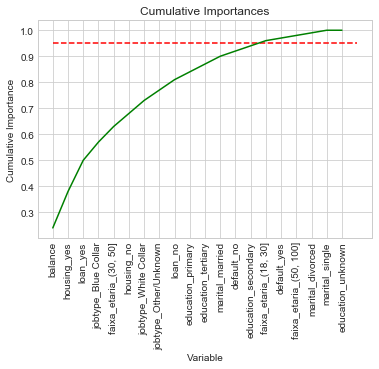

In [74]:
# List of features for later use
feature_list = list(X.columns)


# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# printing
for f in feature_importances:
    print (f)

# list of x locations for plotting
x_values = list(range(len(importances)))

# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');


## Avaliando o modelo

### Confusion Matrix

In [75]:
y_pred = rf.predict(X_test)

print('Acurácia no treino: {:.2f}'.format(rf.score(X_train, y_train)))
print('Acurácia no teste: {:.2f}'.format(rf.score(X_test, y_test)))

Acurácia no treino: 0.64
Acurácia no teste: 0.62


In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[749 452]
 [ 70  86]]


In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.62      0.74      1201
           1       0.16      0.55      0.25       156

   micro avg       0.62      0.62      0.62      1357
   macro avg       0.54      0.59      0.49      1357
weighted avg       0.83      0.62      0.68      1357



## Curva ROC

In [119]:
probas_pred = rf.predict_proba(X_test)[:,1]

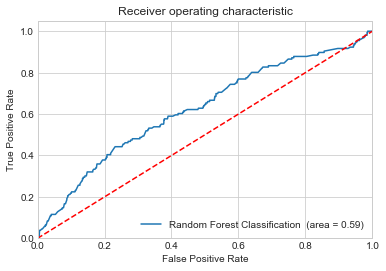

In [120]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, rf.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, probas_pred)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classification  (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

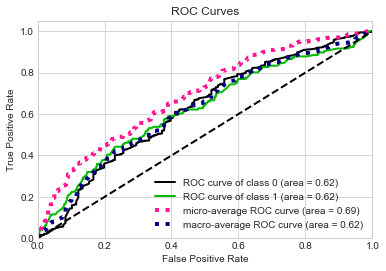

In [123]:
from  scikitplot.metrics import plot_roc

plot_roc(y_test,  rf.predict_proba(X_test))

### Curva precision x recall 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


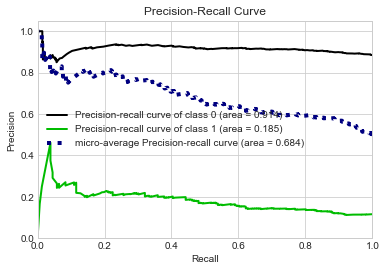

In [125]:
from scikitplot.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve


plt.figure(figsize=(20,10))

plot_precision_recall_curve(y_test, rf.predict_proba(X_test))

In [150]:
#precision, recall, thresholds = precision_recall_curve(y_test, probas_pred)

thresould = 0.4

from sklearn.metrics import classification_report
print(classification_report(y_test, np.where (probas_pred > thresould, 1 , 0)))


              precision    recall  f1-score   support

           0       0.93      0.39      0.55      1201
           1       0.14      0.77      0.24       156

   micro avg       0.44      0.44      0.44      1357
   macro avg       0.54      0.58      0.40      1357
weighted avg       0.84      0.44      0.52      1357



### Lift Chart

referência: https://www.datasciencecentral.com/profiles/blogs/understanding-and-interpreting-gain-and-lift-charts


Um gráfico Lift (gráfico de elevação) representa graficamente a melhoria que um modelo oferece quando comparado a um palpite aleatório e mede a mudança em termos de uma pontuação de elevação. Ao comparar as pontuações de elevação para modelos diferentes, você pode determinar qual modelo é o melhor. Você também pode determinar o ponto em que as previsões do modelo se tornam menos úteis. Por exemplo, analisando o gráfico de elevação abaixo, é possível perceber que uma campanha promocional provavelmente será eficaz contra apenas 40% de seus clientes e usar esse valor para limitar o escopo da campanha.


In [60]:
from scikitplot.metrics import plot_lift_curve

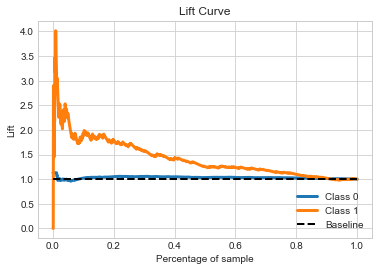

In [61]:
plot_lift_curve( y_test, rf.predict_log_proba(X_test))